<a href="https://colab.research.google.com/github/Eswa2020/Data-analysis-and-wrangling-various-projects/blob/master/isbuy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

##Reading data And Exploration

In [3]:
data = pd.read_csv('training.csv')
data.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              72983 non-null  int64  
 1   IsBadBuy                           72983 non-null  int64  
 2   PurchDate                          72983 non-null  object 
 3   Auction                            72983 non-null  object 
 4   VehYear                            72983 non-null  int64  
 5   VehicleAge                         72983 non-null  int64  
 6   Make                               72983 non-null  object 
 7   Model                              72983 non-null  object 
 8   Trim                               70623 non-null  object 
 9   SubModel                           72975 non-null  object 
 10  Color                              72975 non-null  object 
 11  Transmission                       72974 non-null  obj

In [5]:
# Calculate the percentage of missing data for each column
missing_data = data.isnull().mean() * 100

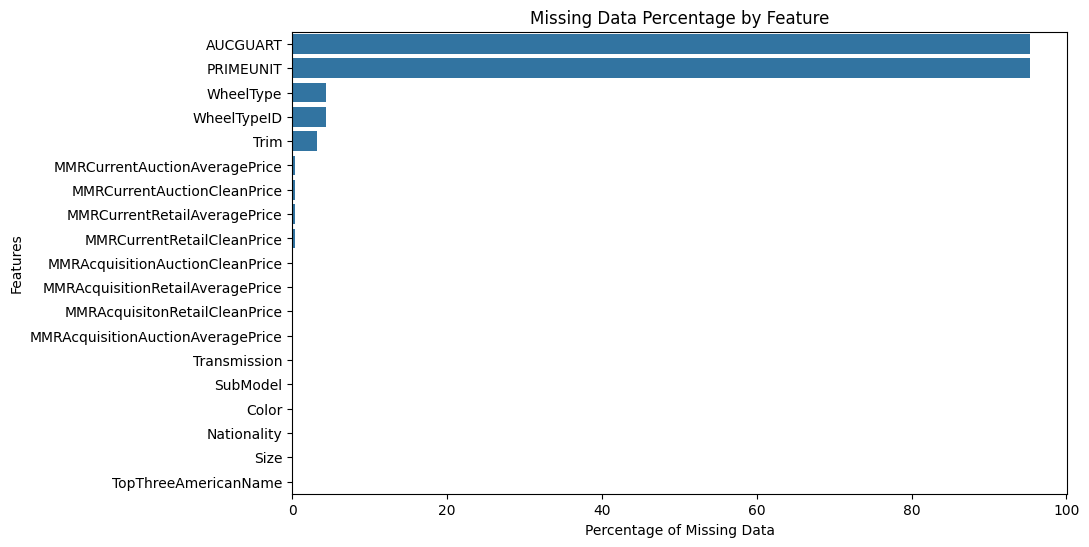

In [6]:
# Filter columns with missing data
missing_data = missing_data[missing_data > 0]

# Sort missing data in descending order
missing_data = missing_data.sort_values(ascending=False)

# Visualize the missing data distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_data.values, y=missing_data.index)
plt.title("Missing Data Percentage by Feature")
plt.xlabel("Percentage of Missing Data")
plt.ylabel("Features")
plt.show()


##Data Cleaning

In [7]:
# Handling missing data for the dataset
# Categorical columns to fill with most frequent
# Replace missing values in each categorical column with its most frequent value
categorical_fill_unknown = ['PRIMEUNIT', 'AUCGUART']

for col in categorical_fill_unknown:
    most_frequent = data[col].mode()[0]
    data[col] = data[col].fillna(most_frequent)

In [8]:
# Handle remaining categorical columns
remaining_categorical = ['Trim', 'SubModel', 'Color', 'Transmission', 'WheelType',
                         'Nationality', 'Size', 'TopThreeAmericanName']
for col in remaining_categorical:
    most_frequent = data[col].mode()[0]
    data[col] = data[col].fillna(most_frequent)

In [9]:
# Re-check missing values
remaining_missing_after_categorical = data.isnull().sum()
remaining_missing_after_categorical = remaining_missing_after_categorical[remaining_missing_after_categorical > 0]

In [10]:
remaining_missing_after_categorical.head(15)

,0
WheelTypeID,3169
MMRAcquisitionAuctionAveragePrice,18
MMRAcquisitionAuctionCleanPrice,18
MMRAcquisitionRetailAveragePrice,18
MMRAcquisitonRetailCleanPrice,18
MMRCurrentAuctionAveragePrice,315
MMRCurrentAuctionCleanPrice,315
MMRCurrentRetailAveragePrice,315
MMRCurrentRetailCleanPrice,315


In [11]:
# Impute 'WheelTypeID' with the most frequent value (mode)
most_frequent_wheeltypeid = data['WheelTypeID'].mode()[0]
data['WheelTypeID'] = data['WheelTypeID'].fillna(most_frequent_wheeltypeid)

In [12]:
# List of MMR price-related columns to impute
mmr_price_columns = [
    'MMRAcquisitionAuctionAveragePrice',
    'MMRAcquisitionAuctionCleanPrice',
    'MMRAcquisitionRetailAveragePrice',
    'MMRAcquisitonRetailCleanPrice',
    'MMRCurrentAuctionAveragePrice',
    'MMRCurrentAuctionCleanPrice',
    'MMRCurrentRetailAveragePrice',
    'MMRCurrentRetailCleanPrice'
]

In [13]:
# Impute MMR price columns with median grouped by 'Make' and 'VehicleAge'
for col in mmr_price_columns:
    data[col] = data.groupby(['Make', 'VehicleAge'])[col].transform(
        lambda x: x.fillna(x.median())
    )

In [14]:
# Re-check missing values
remaining_missing_after_categorical = data.isnull().sum()
remaining_missing_after_categorical = remaining_missing_after_categorical[remaining_missing_after_categorical > 0]

In [15]:
remaining_missing_after_categorical.head(15)

,0


## Prepare Data for modelling

In [16]:
# Prepare the data: separate features (X) and target (y)
X = data.drop(columns=['IsBadBuy'])  # Drop the target column
y = data['IsBadBuy']

In [17]:
# Convert categorical features to numeric via one-hot encoding
X1 = pd.get_dummies(X, drop_first=True)

In [18]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

##Train the model

In [19]:
# Train a Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Predict on the test set
y_pred = dt_model.predict(X_train)

In [ ]:
# Evaluate the model
mae1 = mean_absolute_error(y_train, y_pred)
rmse1= np.sqrt(mean_squared_error(y_train, y_pred))
r1= r2_score(y_train, y_pred)

print(f"MAE: {mae1:.2f}, RMSE: {rmse1:.2f}, R^2: {r1:.2f}")


In [20]:
# Extract feature importance
feature_importances = dt_model.feature_importances_
feature_names = X1.columns

In [21]:
# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

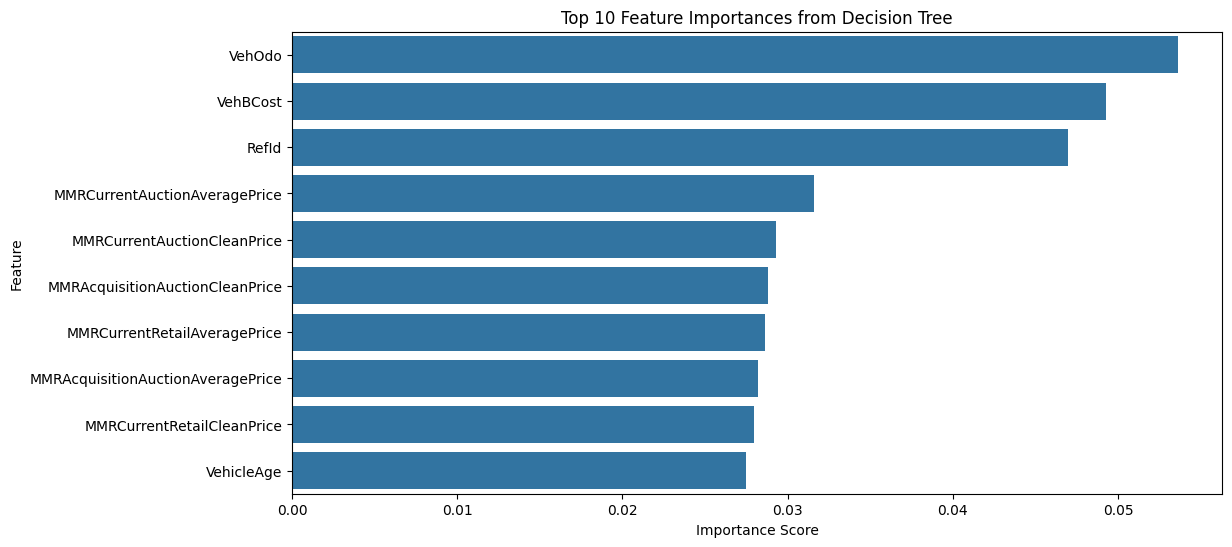

In [22]:
# Visualize the top 10 most important features
plt.figure(figsize=(12, 6))
sns.barplot(x=importance_df['Importance'][:10], y=importance_df['Feature'][:10])
plt.title('Top 10 Feature Importances from Decision Tree')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [23]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': [None, 'sqrt', 'log2']}

In [24]:
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [3, 5, 10, None],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [25]:
# Best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [26]:
# Train the final model with the best parameters
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred1 = best_model.predict(X_train)

In [27]:
# Evaluate the model
mae2 = mean_absolute_error(y_train, y_pred1)
rmse2 = np.sqrt(mean_squared_error(y_train, y_pred1)
r2= r2_score(y_train, y_pred1)

print(f"MAE: {mae2:.2f}, RMSE: {rmse2:.2f}, R^2: {r2:.2f}")

MAE: 0.20, RMSE: 0.32, R^2: 0.04


In [30]:
# Extract feature importance
feature_importances1 = best_model.feature_importances_
feature_names1 = X1.columns

In [31]:
# Create a DataFrame for visualization
importance_df1= pd.DataFrame({
    'Feature': feature_names1,
    'Importance': feature_importances1
}).sort_values(by='Importance', ascending=False)

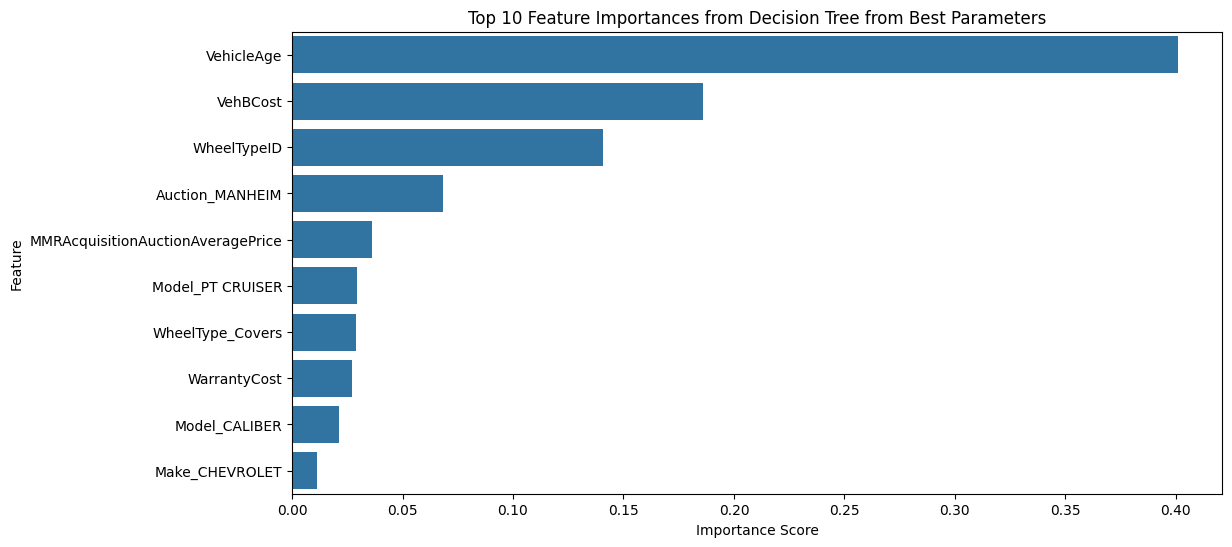

In [33]:
# Visualize the top 10 most important features
plt.figure(figsize=(12, 6))
sns.barplot(x=importance_df1['Importance'][:10], y=importance_df1['Feature'][:10])
plt.title('Top 10 Feature Importances from Decision Tree from Best Parameters')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [35]:
# Predict on the test set
y_pred3= dt_model.predict(X_test)

# Evaluate the model
mae3 = mean_absolute_error(y_test, y_pred3)
rmse3 = np.sqrt(mean_squared_error(y_test, y_pred3))
r3 = r2_score(y_test, y_pred3)

print(f"MAE: {mae3:.2f}, RMSE: {rmse3:.2f}, R^2: {r3:.2f}")

MAE: 0.19, RMSE: 0.43, R^2: -0.78


In [36]:
# Predict on the test set
y_pred4= best_model.predict(X_test)

# Evaluate the model
mae4 = mean_absolute_error(y_test, y_pred4)
rmse4 = np.sqrt(mean_squared_error(y_test, y_pred4))
r4 = r2_score(y_test, y_pred4)

print(f"MAE: {mae4:.2f}, RMSE: {rmse4:.2f}, R^2: {r4:.2f}")


MAE: 0.20, RMSE: 0.32, R^2: 0.04
